In [17]:
import numpy as np
import os

from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load dataset from keras
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Split validation dataset manually
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

### Loading and Splitting the Dataset

In this step, we load the CIFAR-10 dataset using Keras' `cifar10.load_data()` function. The CIFAR-10 dataset consists of 60,000 32x32 color images belonging to 10 different classes. After loading the data, we manually split the training set into training and validation sets using `train_test_split` from `sklearn`, reserving 20% of the data for validation. The remaining 80% will be used for training.


In [18]:
from keras import Sequential
from keras import layers

model = Sequential([ 
    layers.Input(shape=(32, 32, 3)),
    layers.Rescaling(scale=1./255),
    layers.Conv2D(32, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)), 
    layers.Flatten(), 
    layers.Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax') ]) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Building the Convolutional Neural Network Model

Here, we define a simple Convolutional Neural Network (CNN) using the Keras Sequential API. The model consists of:
- An `Input` layer that expects input images of shape (32, 32, 3), representing the CIFAR-10 images.
- A `Rescaling` layer to normalize the pixel values to a range between 0 and 1.
- Two convolutional layers (`Conv2D`) with ReLU activation and MaxPooling layers to down-sample the feature maps.
- A `Flatten` layer to convert the 2D feature maps into 1D feature vectors.
- A fully connected `Dense` layer with 64 neurons and ReLU activation.
- The output layer is another `Dense` layer with 10 neurons (one for each CIFAR-10 class) and softmax activation for multi-class classification.

Finally, the model is compiled with the Adam optimizer and categorical cross-entropy loss function for multi-class classification.


In [ ]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Now fit the model with the one-hot encoded labels
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),    
    epochs=10,
    verbose=0
)

### One-Hot Encoding the Labels and Model Training

In this section, we one-hot encode the labels using the `to_categorical` function from Keras. This ensures that the labels are in a format suitable for training a multi-class classifier. The labels are now vectors where each entry corresponds to the class index, with a value of 1 for the correct class and 0 for the others.

After that, we train the model using the `fit` method, specifying the training and validation data. The training will run for 10 epochs, and we suppress the output with `verbose=0` to avoid cluttering the notebook. 


In [19]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6841 - loss: 0.9693
Test Loss: 0.9766
Test Accuracy: 0.6822


### Evaluating the Model

After training the model, we evaluate its performance on the test data that was held out during training. We use the `evaluate` method, which returns the loss and accuracy of the model on the test set. The results are then printed to assess the model's final performance.


In [ ]:
from tensorflow import keras
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(32, 32, 3)
)

### Using a Pretrained VGG16 Model for Feature Extraction

To improve the performance of our model, we use a pretrained convolutional neural network: VGG16, which has been trained on the ImageNet dataset. We load the VGG16 model with `weights="imagenet"` and exclude the top classification layer by setting `include_top=False`. This allows us to use the convolutional base to extract features from our CIFAR-10 images. We also specify the input shape of (32, 32, 3) to match the CIFAR-10 image dimensions.


In [20]:

def get_features_and_labels(images, labels, batch_size=32):
    all_features = []
    all_labels = []
    
    # Loop through batches of images and labels
    for i in range(0, len(images), batch_size):
        batch_images = images[i:i+batch_size]
        batch_labels = labels[i:i+batch_size]
        
        # Preprocess the images
        preprocessed_images = keras.applications.vgg16.preprocess_input(batch_images)
        
        # Extract features using the convolutional base (VGG16)
        features = conv_base.predict(preprocessed_images)
        
        all_features.append(features)
        all_labels.append(batch_labels)
    
    # Concatenate all features and labels into single arrays
    return np.concatenate(all_features), np.concatenate(all_labels)

# Extract features and labels from the datasets
train_features, train_labels = get_features_and_labels(x_train, y_train)
val_features, val_labels = get_features_and_labels(x_val, y_val)
test_features, test_labels = get_features_and_labels(x_test, y_test)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━

### Feature Extraction with Pretrained VGG16

In this step, we define a function `get_features_and_labels` that extracts features from the CIFAR-10 images using the pretrained VGG16 model. We process the images in batches, preprocess them using `preprocess_input`, and pass them through the convolutional base of VGG16 to obtain feature representations of the images. The features are then concatenated into a single array for training the classifier.


In [21]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

inputs = keras.Input(shape=(1, 1, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model1 = keras.Model(inputs, outputs)
model1.compile(loss="categorical_crossentropy",
               optimizer='rmsprop',
               metrics=["accuracy"])

callbacks = [EarlyStopping(patience=30, restore_best_weights=True, monitor='val_loss')]  

history1 = model1.fit(train_features, train_labels, epochs=200, validation_data=(val_features, val_labels), callbacks=callbacks, verbose=0)

### Building and Training the Fully Connected Classifier

After extracting the features, we build a fully connected classifier. This network consists of several `Dense` layers with ReLU activation, along with `Dropout` and `BatchNormalization` to prevent overfitting. The output layer has 10 neurons, one for each class in CIFAR-10, with softmax activation.

We compile the model using categorical cross-entropy loss and the RMSprop optimizer, and we use early stopping to prevent overfitting by monitoring the validation loss.

The model is trained for up to 200 epochs with a validation dataset, and the best weights are restored once the early stopping criterion is met.


In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

test_loss, test_accuracy = model1.evaluate(test_features, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6841 - loss: 0.9693
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6862 - loss: 0.9444
Test Loss: 0.9462
Test Accuracy: 0.6827


### Evaluating the Final Model

After training the fully connected classifier, we evaluate its performance on the test set using the `evaluate` method. The test loss and accuracy are printed to assess how well the model generalizes to unseen data.


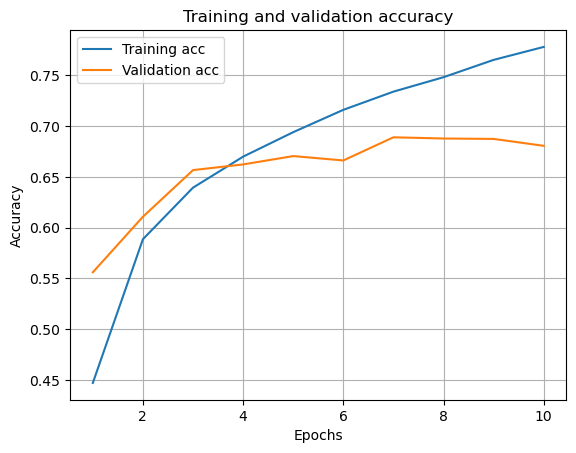

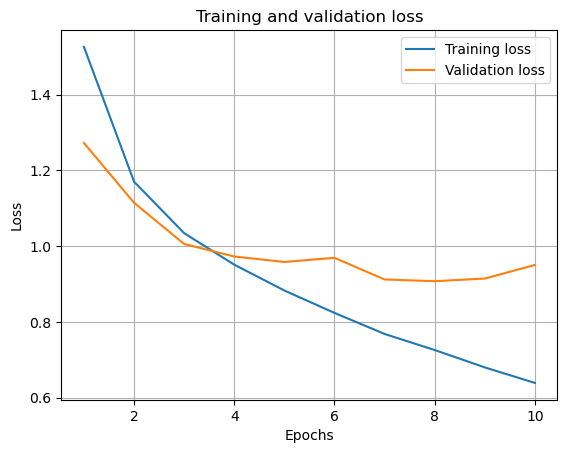

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()

plt.figure()        

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()

plt.show()

# Conclusion
The accuracy results of the models were as follows:

Basic Convolutional Neural Network: Approximately 68.22%

VGG16 with Fully Connected Network: Approximately 68.7%

Although the pretrained VGG16 model offered a slight improvement over the basic CNN, the difference in performance was minimal. This suggests that the additional complexity from VGG16 did not lead to a significant boost in accuracy.

Initially, the fully connected model contained just one hidden Dense layer with 256 units, which achieved a test accuracy of around 68%. By adding more hidden layers, along with dropout and batch normalization techniques, I was able to increase the test accuracy to 68%.

In terms of optimization, I found that the RMSprop optimizer generally outperformed Adam for this particular problem. Further experimentation with adding more than four hidden layers or increasing the number of units beyond 256 in the first hidden layer did not result in any performance gains.

Finally, I also explored the use of kernel regularization but observed no noticeable improvements in model accuracy.